## Network Model
### TextRank

TextRank is an algorithm for natural language processing (NLP) tasks such as summarization and keyword extraction. It is based on the PageRank algorithm, which is used by Google to rank websites in their search engine results.

In [11]:
import pandas as pd

In [12]:
t = pd.read_csv("../data/musicRelated/artist_inpiration.csv")
t.head()

,singer,singerLabel,INSPIRE_ID
0,http://www.wikidata.org/entity/Q303,Elvis Presley,NaN
1,http://www.wikidata.org/entity/Q392,Bob Dylan,http://www.wikidata.org/entity/Q4061
2,http://www.wikidata.org/entity/Q392,Bob Dylan,http://www.wikidata.org/entity/Q6711
3,http://www.wikidata.org/entity/Q409,Bob Marley,NaN
4,http://www.wikidata.org/entity/Q512,Vladimir Vysotsky,NaN


In [13]:
i = t[t['singer'].isin(t.INSPIRE_ID)]

In [14]:
i

,singer,singerLabel,INSPIRE_ID
0,http://www.wikidata.org/entity/Q303,Elvis Presley,NaN
1,http://www.wikidata.org/entity/Q392,Bob Dylan,http://www.wikidata.org/entity/Q4061
2,http://www.wikidata.org/entity/Q392,Bob Dylan,http://www.wikidata.org/entity/Q6711
3,http://www.wikidata.org/entity/Q409,Bob Marley,NaN
7,http://www.wikidata.org/entity/Q633,Neil Young,NaN
...,...,...,...
80774,http://www.wikidata.org/entity/Q30309009,Khader Bashir,NaN
85571,http://www.wikidata.org/entity/Q42308824,Eny Sagita,NaN
87285,http://www.wikidata.org/entity/Q60555322,Ahmed Bizmawn,NaN
87828,http://www.wikidata.org/entity/Q57261031,Eden Hason,NaN


In [15]:
t.shape,i.shape

((109334, 3), (480, 3))

#### Cleaning data and dropping NaN values

In [16]:
t_f = pd.merge(t,i,how = 'left',left_on = 'INSPIRE_ID',right_on='singer')

In [17]:
col = t_f.columns

In [18]:
t_f = t_f[[col[1],col[4]]]

In [19]:
d_t_f = t_f.dropna()

In [20]:
d_t_f.shape

(1147, 2)

In [21]:
d_t_f.drop_duplicates().reset_index(drop=True)


,singerLabel_x,singerLabel_y
0,Bob Dylan,Woody Guthrie
1,Madonna,David Bowie
2,Madonna,Mae West
3,Madonna,Debbie Harry
4,Madonna,Chrissie Hynde
...,...,...
656,Bianca Costa,Vanessa da Mata
657,Jade Above,Lana Del Rey
658,Jade Above,Yoann Lemoine
659,Jade Above,Pierre Lapointe


### Here *"singerLabel_x"* represents an individual signer and *"singerLabel_y"* represents the singers who have influenced the individual singer
Eg. Bob Dylan was influenced by Woody Guthrie

In [22]:
d_t_f.reset_index(drop=True)

,singerLabel_x,singerLabel_y
0,Bob Dylan,Woody Guthrie
1,Madonna,David Bowie
2,Madonna,Mae West
3,Madonna,Debbie Harry
4,Madonna,Chrissie Hynde
...,...,...
1142,Jade Above,Sam Smith
1143,Jade Above,Sam Smith
1144,Jade Above,Sam Smith
1145,Jade Above,Sam Smith


In [23]:
f_col = d_t_f.columns
f_col

Index(['singerLabel_x', 'singerLabel_y'], dtype='object')

### Plotting the graph

In [24]:
import networkx as nx
G=nx.from_pandas_edgelist(d_t_f, f_col[0], f_col[1])

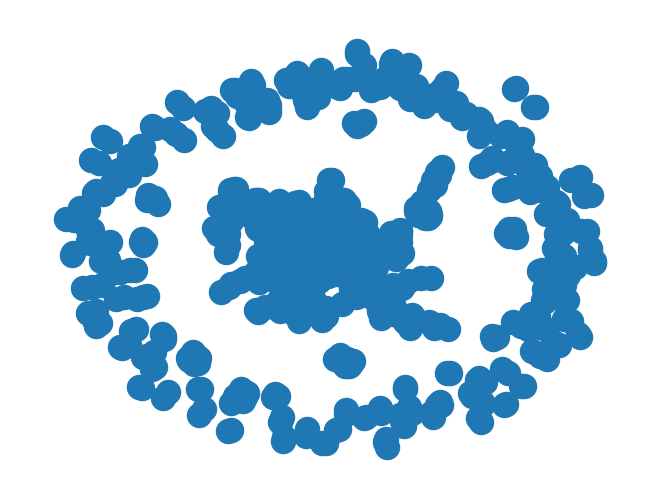

In [25]:
import matplotlib as pl
%matplotlib inline
nx.draw(G,pos=nx.spring_layout(G))

{'Bob Dylan': Text(-0.05358924716711044, 0.23247438669204712, 'Bob Dylan'),
 'Woody Guthrie': Text(-0.10592560470104218, 0.23939955234527588, 'Woody Guthrie'),
 'Madonna': Text(0.06094804033637047, 0.06617822498083115, 'Madonna'),
 'David Bowie': Text(0.11744919419288635, 0.16469807922840118, 'David Bowie'),
 'Mae West': Text(-0.012613455764949322, 0.07922140508890152, 'Mae West'),
 'Debbie Harry': Text(0.05224774405360222, 0.10050050914287567, 'Debbie Harry'),
 'Chrissie Hynde': Text(0.07140820473432541, 0.09879007190465927, 'Chrissie Hynde'),
 'Ella Fitzgerald': Text(0.1653391420841217, -0.11108921468257904, 'Ella Fitzgerald'),
 'Maxine Sullivan': Text(0.19918394088745117, -0.133626326918602, 'Maxine Sullivan'),
 'Daniel Balavoine': Text(-0.002668191911652684, 0.1607522815465927, 'Daniel Balavoine'),
 'Phil Collins': Text(0.055794693529605865, 0.07047372311353683, 'Phil Collins'),
 'Peter Gabriel': Text(-0.025117235258221626, 0.19082610309123993, 'Peter Gabriel'),
 'Christophe': Text

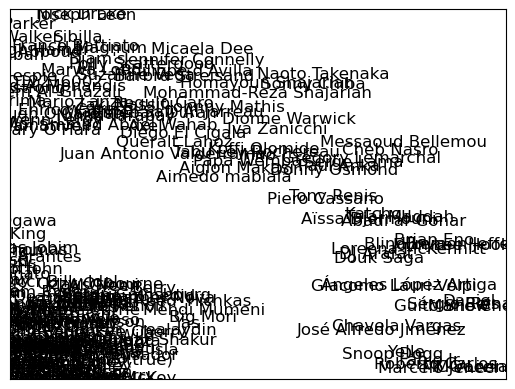

In [26]:
nx.draw_networkx_labels(G,pos=nx.spring_layout(G))

In [27]:
stmarks = G
import numpy as np
from scipy import sparse
import scipy.sparse.linalg
species = np.array(list(stmarks.nodes()))  # array for multi-indexing
Adj = nx.to_scipy_sparse_matrix(stmarks, dtype=np.float64)

In [28]:
Adj
len(species)

736

In [29]:
import pandas as pd
pd.DataFrame(species[:736]).T

,0,1,2,3,4,5,6,7,8,9,...,726,727,728,729,730,731,732,733,734,735
0,Bob Dylan,Woody Guthrie,Madonna,David Bowie,Mae West,Debbie Harry,Chrissie Hynde,Ella Fitzgerald,Maxine Sullivan,Daniel Balavoine,...,Anuel AA,Luna Ki,Gwen Stefani,Bianca Costa,Adriana Calcanhotto,Vanessa da Mata,Jade Above,Lana Del Rey,Yoann Lemoine,Pierre Lapointe


In [30]:
n = len(species)
Adj

<736x736 sparse matrix of type '<class 'numpy.float64'>'
	with 1322 stored elements in Compressed Sparse Row format>

In [31]:
pd.DataFrame(Adj.todense())

,0,1,2,3,4,5,6,7,8,9,...,726,727,728,729,730,731,732,733,734,735
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
np.seterr(divide='ignore')  # ignore division-by-zero errors

degrees = np.ravel(Adj.sum(axis=1))
Deginv = sparse.diags(1 / degrees).tocsr()

In [33]:
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(10, 5))
    # you may have to replace 'axisbg' below with 'facecolor', depending on the version of your matplotlib
    ax = fig.add_subplot(111, facecolor='black') #axisbg='b')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

/Users/soeb/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 640x480 with 0 Axes>

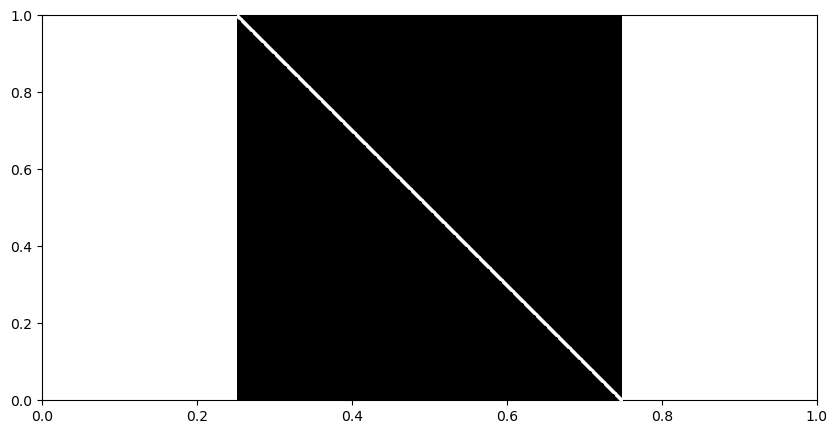

In [34]:
m = sparse.diags(1 / degrees).tocoo()
ax = plot_coo_matrix(m)
ax.figure.show()

/Users/soeb/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 640x480 with 0 Axes>

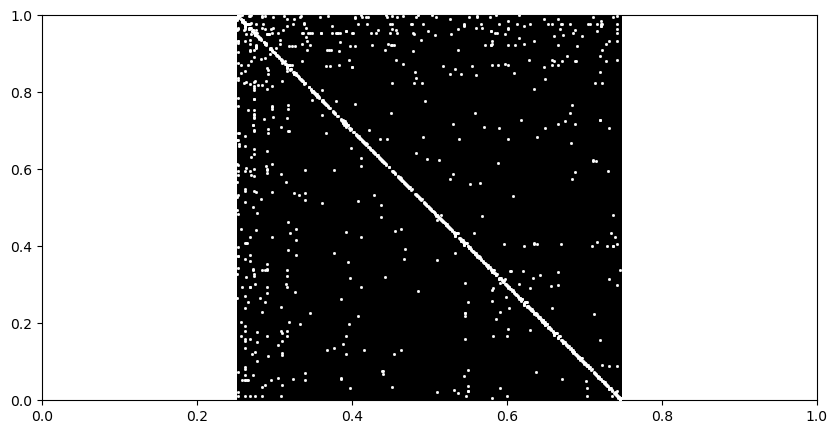

In [35]:
A = Adj.tocoo()
ax = plot_coo_matrix(A)
ax.figure.show()

In [36]:
dense = Adj.todense()
#for x in np.nditer(dense, order='K'):
#    print (int(x)),

#for row in dense[0]:
#    numbers =[ np.vectorize(np.int)(x) for x in row ]
#''.join(str(i) for i in numbers).replace(' ', '').replace('\n', '')

# ok this was way too hard!
for i in range(48):
    for row in dense[i]:
        numbers =[ np.vectorize(np.int)(x) for x in row ]
        degrees = np.sum(numbers)
        print(''.join(str(i) for i in numbers).replace(' ', '').replace('\n', '') + ' ' + str(degrees))

/Users/soeb/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == "":


[[0100000001000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000010000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]] 9
[[100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [37]:
Trans = (Deginv @ Adj).T
Trans

<736x736 sparse matrix of type '<class 'numpy.float64'>'
	with 1322 stored elements in Compressed Sparse Column format>

In [38]:
dTrans = Trans.T.todense()
dTrans[0]

matrix([[0.        , 0.11111111, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.11111111,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.11111111, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

In [39]:
from scipy.sparse.linalg import spsolve

damping = 0.85
beta = 1 - damping

I = sparse.eye(n, format='csc')  # Same sparse format as Trans

pagerank = spsolve(I - damping * Trans,
                   np.full(n, beta / n))

In [41]:
def pagerank_plot(in_degrees, pageranks, names, *,
                  annotations=[], **figkwargs):
    """Plot node pagerank against in-degree, with hand-picked node names."""

    fig, ax = plt.subplots(**figkwargs)
    ax.scatter(in_degrees, pageranks, c=[0.835, 0.369, 0], lw=0)
    for name, indeg, pr in zip(names, in_degrees, pageranks):
        if name in annotations:
            text = ax.text(indeg + 0.1, pr, name)

    ax.set_ylim(0, np.max(pageranks) * 1.1)
    ax.set_xlim(-1, np.max(in_degrees) * 1.1)
    ax.set_ylabel('PageRank')
    ax.set_xlabel('In-degree (number of Influences)')

In [40]:
import pandas as pd
in_degrees = np.ravel(Adj.sum(axis=0))
final = []
for i, (s, d, p) in enumerate(zip(species, in_degrees, pagerank)):
    final.append( [s,p])
    print(i, s, '(' + str(d) + ')', p)

0 Bob Dylan (9.0) 0.005074326510511405
1 Woody Guthrie (2.0) 0.0012150815725812788
2 Madonna (14.0) 0.006600608428293416
3 David Bowie (16.0) 0.008537161227157503
4 Mae West (3.0) 0.0018026123090222191
5 Debbie Harry (2.0) 0.001044520620805157
6 Chrissie Hynde (1.0) 0.0006045555738296158
7 Ella Fitzgerald (6.0) 0.00286791807975526
8 Maxine Sullivan (1.0) 0.0006100927424580821
9 Daniel Balavoine (4.0) 0.0022642133592888176
10 Phil Collins (3.0) 0.0014708915149423464
11 Peter Gabriel (1.0) 0.0006849496866749607
12 Christophe (1.0) 0.0006849496866749607
13 George Harrison (2.0) 0.001371315285912548
14 Chuck Berry (3.0) 0.0017607868072883975
15 Carl Perkins (1.0) 0.0007866133443389199
16 Michael Jackson (31.0) 0.014792276576037525
17 James Brown (5.0) 0.0027580878471462783
18 Diana Ross (2.0) 0.0010077149081995536
19 Fred Astaire (1.0) 0.0006093990281367935
20 Jackie Wilson (3.0) 0.001395258015673343
21 Sam Cooke (5.0) 0.0023662208352175644
22 Sammy Davis Jr. (1.0) 0.0006093990281367933
23

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


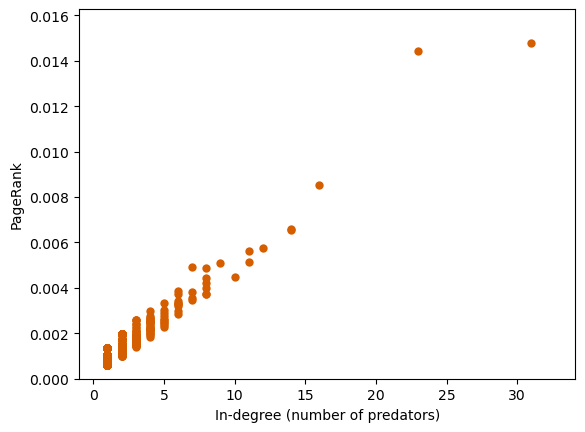

In [42]:

in_degrees = np.ravel(Adj.sum(axis=0))
pagerank_plot(in_degrees, pagerank, species)

In [43]:
final[:2]

[['Bob Dylan', 0.005074326510511405], ['Woody Guthrie', 0.0012150815725812788]]

In [44]:
final1 = (sorted(final, key = lambda x: x[1], reverse = True))

### Plot of top singers with the most influence

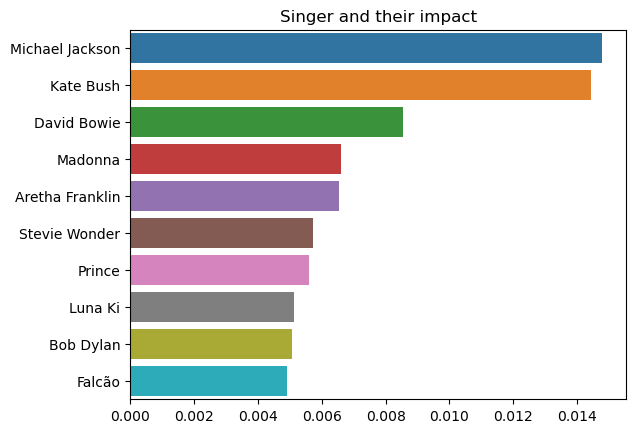

In [45]:
import seaborn as sns

t = lambda x:[i[x] for i in final1[:10]]

sns.barplot(x=t(1),y=t(0),orient='h')
plt.title('Singer and their impact')
plt.show()

In [46]:
final[:10]

[['Bob Dylan', 0.005074326510511405],
 ['Woody Guthrie', 0.0012150815725812788],
 ['Madonna', 0.006600608428293416],
 ['David Bowie', 0.008537161227157503],
 ['Mae West', 0.0018026123090222191],
 ['Debbie Harry', 0.001044520620805157],
 ['Chrissie Hynde', 0.0006045555738296158],
 ['Ella Fitzgerald', 0.00286791807975526],
 ['Maxine Sullivan', 0.0006100927424580821],
 ['Daniel Balavoine', 0.0022642133592888176]]